In [1]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.35. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [2]:
file_path="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

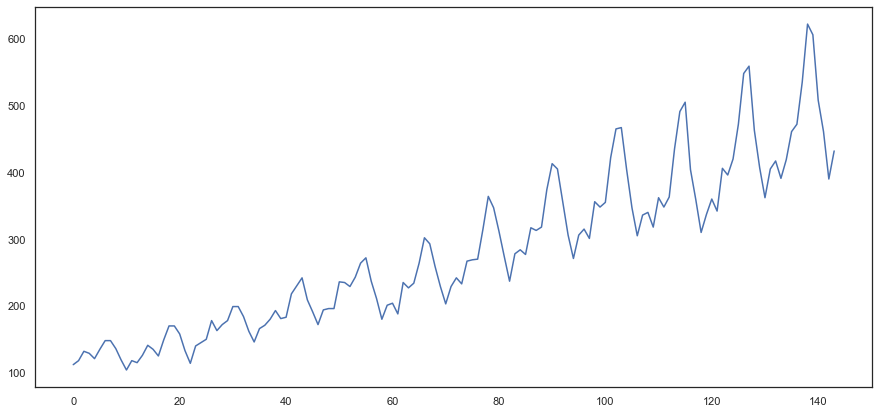

In [4]:
dataset['Passengers'].plot(figsize=(15,7))

# Train Model

In [5]:
ts_column = 'Month'
target = 'Passengers'
sep = ','

In [6]:
FORECAST_PERIOD = 12

In [7]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      0.8153688792060433      |
|           p-value           |      0.9918802434376409      |
|          #Lags Used         |             13.0             |
| Number of Observations Used |            130.0             |
|     Critical Value (1%)     |     -3.4816817173418295      |
|     Critical Value (5%)     |     -2.8840418343195267      |
|     Critical Value (10%)    |      -2.578770059171598      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

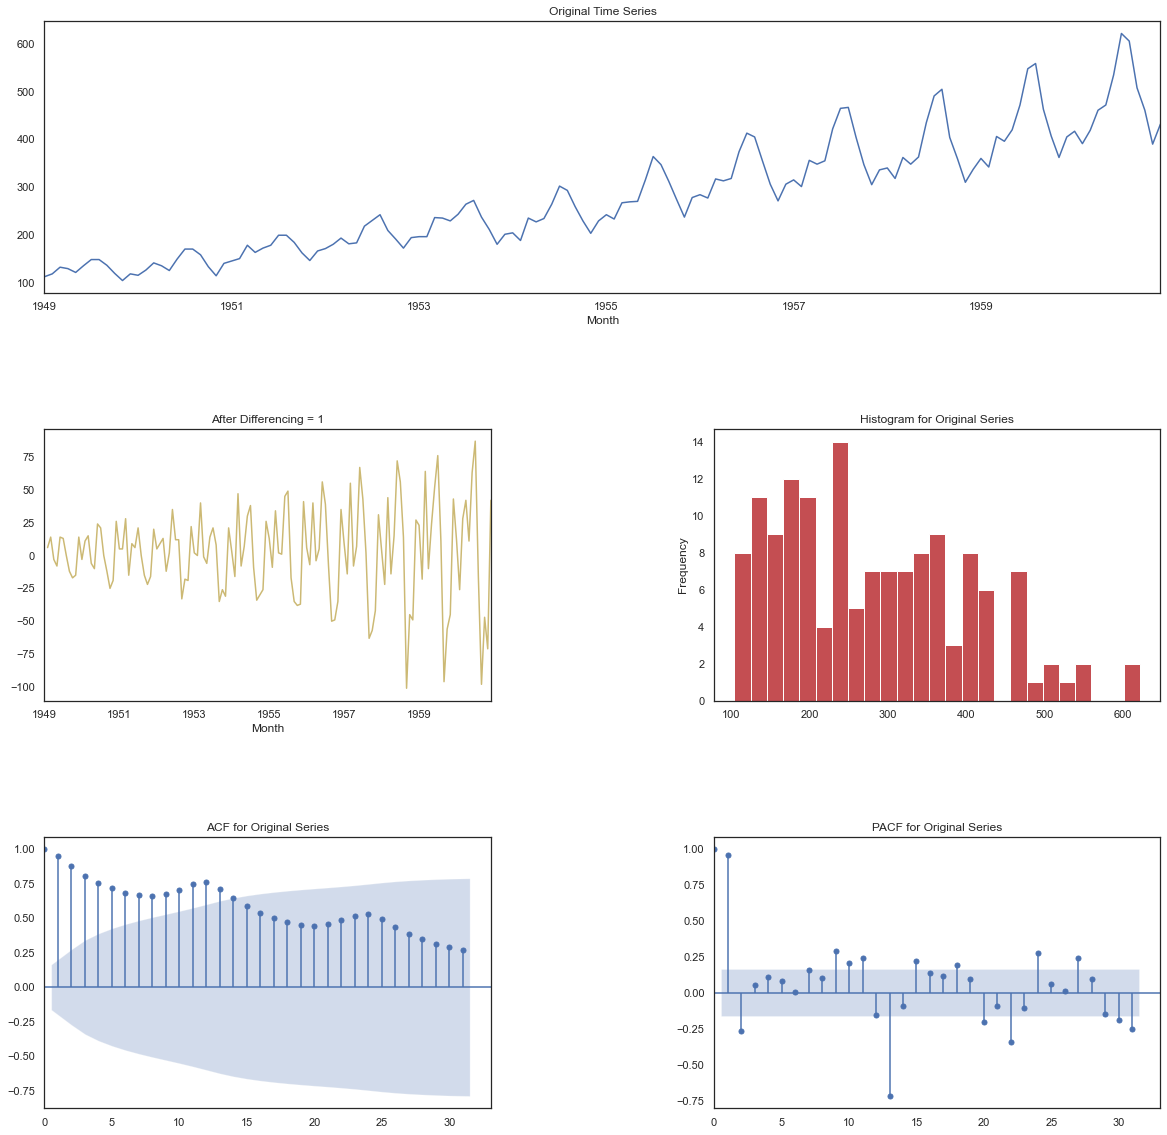

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(144, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 129 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 21.84
    Std Deviation of actuals = 19.10
    Normalized RMSE = 114%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 134 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 49.74
    Std Deviation of actuals = 70.65
    Normalized RMSE = 70%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 139 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 33.94
    Std Deviation of actuals = 74.06
    Norm

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1377.086, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1385.551, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0]          
Total fit time: 3.382 seconds

Best model is a Seasonal SARIMAX(3,1,2)*(0,0,0,12), aic = 1377.086
Refitting data with previously found best parameters
    Best aic metric = 1337.9
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -660.940
Date:                Sat, 13 Mar 2021   AIC                           1337.880
Time:                        23:08:20   BIC                           1361.413
Sample:                    01-01-1949   HQIC                          1347.443
                         - 12-01-1960        

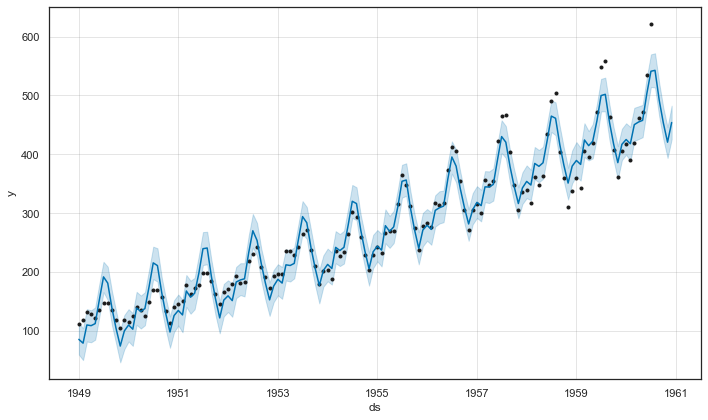

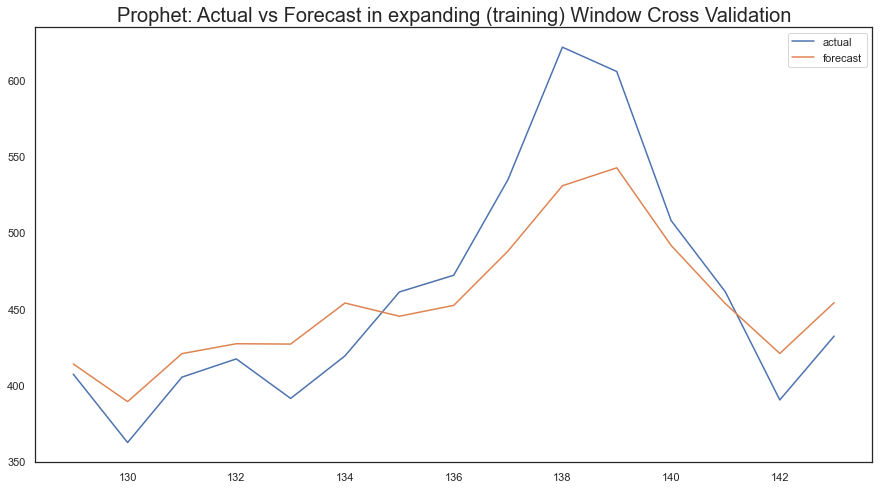

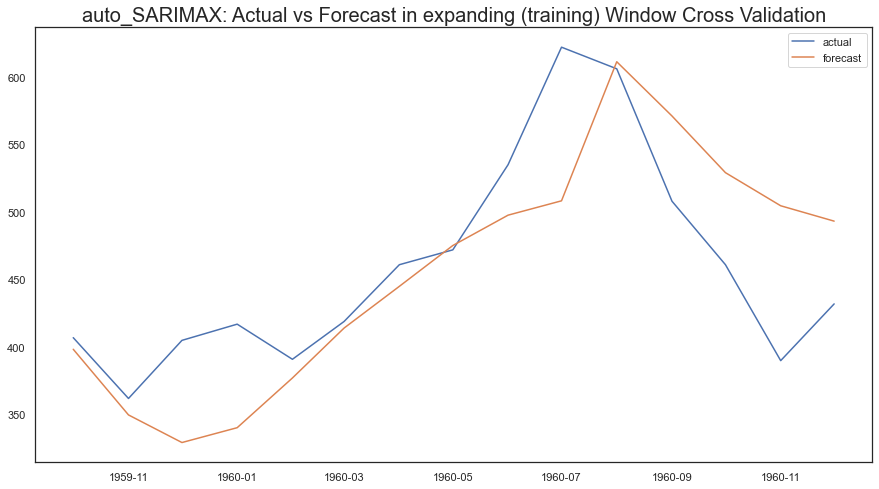

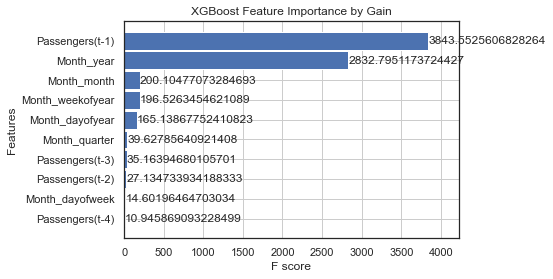

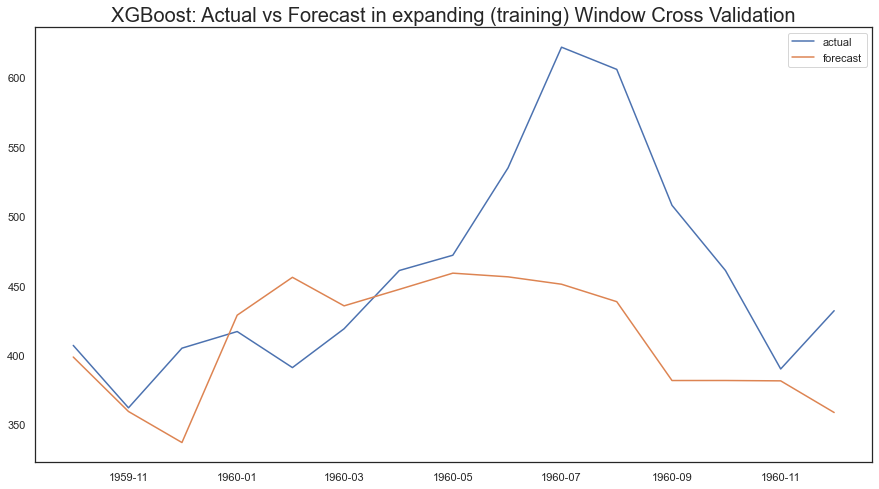

In [8]:
model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [9]:
model.get_leaderboard()

,name,rmse
0,Prophet,35.174186
1,auto_SARIMAX,58.174377
3,ML,77.689723
2,VAR,inf


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

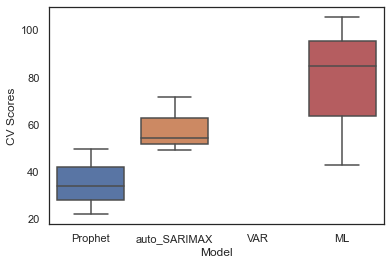

In [10]:
model.plot_cv_scores()

In [11]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,21.843655
1,Prophet,49.742519
2,Prophet,33.936383
3,auto_SARIMAX,48.994754
4,auto_SARIMAX,54.062245
5,auto_SARIMAX,71.466132
6,VAR,inf
7,ML,42.613006
8,ML,84.857195
9,ML,105.598969


In [12]:
results_dict = model.get_ml_dict()

In [13]:
results_dict['Prophet']['forecast']  

array([413.71084386, 388.90451951, 420.46310064, 426.97400871,
       426.75261487, 453.74458755, 445.05801229, 452.18561676,
       487.96077268, 530.86845349, 542.66368545, 491.62921925,
       453.28591593, 420.58905618, 453.99322486])

In [14]:
results_dict['auto_SARIMAX']['forecast'] 

[array([398.41782134, 349.81845067, 329.38574084, 340.37468595,
        377.16415907]),
 array([414.126093  , 444.99021955, 475.19913301, 497.67086887,
        508.29043482]),
 array([611.23007423, 571.07102091, 529.130929  , 504.62611786,
        493.24346903])]

In [15]:
results_dict['ML']['forecast'] 

[array([398.62067, 359.34613, 336.96634, 428.77496, 456.07578],
       dtype=float32),
 array([435.5108 , 447.40277, 459.08197, 456.42245, 451.10553],
       dtype=float32),
 array([438.52243, 381.6762 , 381.69296, 381.4334 , 358.6087 ],
       dtype=float32)]

# Forecast Results

In [16]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

Building Forecast dataframe. Forecast Period = 5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
137,1960-06-01,467.072644,471.037858,531.171921,467.072644,467.072644,34.122863,34.122863,34.122863,34.122863,34.122863,34.122863,0.0,0.0,0.0,501.195507
138,1960-07-01,470.112238,510.028864,567.163781,470.112238,470.112238,70.442806,70.442806,70.442806,70.442806,70.442806,70.442806,0.0,0.0,0.0,540.555043
139,1960-08-01,473.253151,511.520583,569.631200,473.253151,473.253151,68.289264,68.289264,68.289264,68.289264,68.289264,68.289264,0.0,0.0,0.0,541.542414
140,1960-09-01,476.394064,462.237620,522.404944,476.394064,476.394064,16.181830,16.181830,16.181830,16.181830,16.181830,16.181830,0.0,0.0,0.0,492.575894
141,1960-10-01,479.433657,429.576904,485.345204,479.433657,479.433657,-22.041750,-22.041750,-22.041750,-22.041750,-22.041750,-22.041750,0.0,0.0,0.0,457.391907
142,1960-11-01,482.574570,393.475361,452.846263,482.574570,482.574570,-59.930506,-59.930506,-59.930506,-59.930506,-59.930506,-59.930506,0.0,0.0,0.0,422.644065
143,1960-12-01,485.614164,423.455459,484.341050,485.614164,485.614164,-33.384137,-33.384137,-33.384137,-33.384137,-33.384137,-33.384137,0.0,0.0,0.0,452.230027
144,1960-12-31,488.653757,435.750285,491.754055,488.653757,488.653757,-25.239421,-25.239421,-25.239421,-25.239421,-25.239421,-25.239421,0.0,0.0,0.0,463.414336
145,1961-01-31,491.794670,426.754206,483.901394,491.785357,491.809485,-35.550936,-35.550936,-35.550936,-35.550936,-35.550936,-35.550936,0.0,0.0,0.0,456.243734
146,1961-02-28,494.631624,470.265619,525.235647,494.594105,494.675081,3.426365,3.426365,3.426365,3.426365,3.426365,3.426365,0.0,0.0,0.0,498.057989


In [17]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Passengers,yhat,mean_se,mean_ci_lower,mean_ci_upper
1961-01-01,505.105300,29.830836,446.637935,563.572665
1961-02-01,527.171325,46.461034,436.109373,618.233277
1961-03-01,542.751845,50.162975,444.434220,641.069470
1961-04-01,529.614391,50.431163,430.771127,628.457655
1961-05-01,525.894257,50.738106,426.449397,625.339117


In [18]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Building Forecast dataframe. Forecast Period = 5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
137,1960-06-01,467.072644,473.937835,530.455446,467.072644,467.072644,34.122863,34.122863,34.122863,34.122863,34.122863,34.122863,0.0,0.0,0.0,501.195507
138,1960-07-01,470.112238,510.385679,570.302436,470.112238,470.112238,70.442806,70.442806,70.442806,70.442806,70.442806,70.442806,0.0,0.0,0.0,540.555043
139,1960-08-01,473.253151,513.569157,571.965558,473.253151,473.253151,68.289264,68.289264,68.289264,68.289264,68.289264,68.289264,0.0,0.0,0.0,541.542414
140,1960-09-01,476.394064,462.139576,519.154790,476.394064,476.394064,16.181830,16.181830,16.181830,16.181830,16.181830,16.181830,0.0,0.0,0.0,492.575894
141,1960-10-01,479.433657,429.766006,486.277148,479.433657,479.433657,-22.041750,-22.041750,-22.041750,-22.041750,-22.041750,-22.041750,0.0,0.0,0.0,457.391907
142,1960-11-01,482.574570,394.363031,450.809481,482.574570,482.574570,-59.930506,-59.930506,-59.930506,-59.930506,-59.930506,-59.930506,0.0,0.0,0.0,422.644065
143,1960-12-01,485.614164,423.351210,480.391298,485.614164,485.614164,-33.384137,-33.384137,-33.384137,-33.384137,-33.384137,-33.384137,0.0,0.0,0.0,452.230027
144,1960-12-31,488.653757,434.644487,490.734547,488.653757,488.653757,-25.239421,-25.239421,-25.239421,-25.239421,-25.239421,-25.239421,0.0,0.0,0.0,463.414336
145,1961-01-31,491.794670,427.614051,484.220744,491.782756,491.804050,-35.550936,-35.550936,-35.550936,-35.550936,-35.550936,-35.550936,0.0,0.0,0.0,456.243734
146,1961-02-28,494.631624,469.934852,525.962755,494.597465,494.669185,3.426365,3.426365,3.426365,3.426365,3.426365,3.426365,0.0,0.0,0.0,498.057989
